In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.optimize import curve_fit


In [3]:

def crear_dataframe_desde_archivo(path, nombres_columnas):
    # Leer el archivo y eliminar la primera línea
    with open(path, 'r') as file:
        lines = file.readlines()[1:]

    # Patrón para encontrar los valores entre corchetes
    pattern = r"\[([-.\d\s,]*)\]"

    # Lista para almacenar las listas de valores
    lista_de_listas = []

    # Extraer los valores entre corchetes de cada línea
    for line in lines:
        matches = re.findall(pattern, line)
        if matches:
            valores = [float(x) for x in matches[0].split(',')]
            lista_de_listas.append(valores)

    # Crear un DataFrame a partir de la lista de listas
    df = pd.DataFrame(lista_de_listas, columns=nombres_columnas)
    return df

def clean_data(df, variable):
    x = df[variable]
    return x

def plot_data(df, variable='x', xlim=None):
    
    x = np.linspace(0, len(df[variable])/20, len(df[variable]))
    y = df[variable]/max(df[variable])
    plt.plot(x, y,label = f"{len(y)}")
    if xlim is not None:
        plt.xlim(*xlim)
    plt.xlabel('Tiempo')
    plt.ylabel(f'Valor de {variable}')
    plt.title(f'Gráfico de {variable} en función del tiempo')
    plt.legend()
    return y




In [4]:
# Ejemplo de uso para graficar la variable 'ax'
path = "RegMove_1S11.txt"
nombres_columnas = ['x', 'y', 'z', 'ax', 'ay', 'az']
df = crear_dataframe_desde_archivo(path, nombres_columnas)

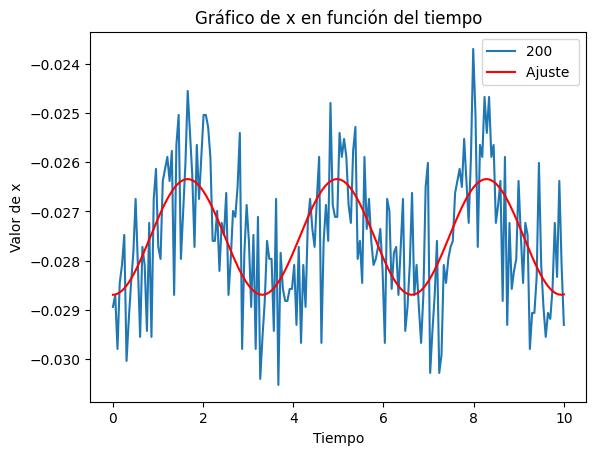

In [73]:
y = df ['x'][0:200]
x = np.linspace(0, len(y)/20, len(y))

#Ajuste
from scipy.optimize import curve_fit
def f(x, a, b, c,d,e):
    return a + b * np.cos(c * x) 

popt, pcov = curve_fit(f, x, y)


plt.plot(x, y,label = f"{len(y)}")
plt.xlabel('Tiempo')
plt.ylabel(f'Valor de x')
plt.title(f'Gráfico de x en función del tiempo')
plt.plot(x, f(x, *popt), 'r-',label = f"Ajuste ")
plt.legend()

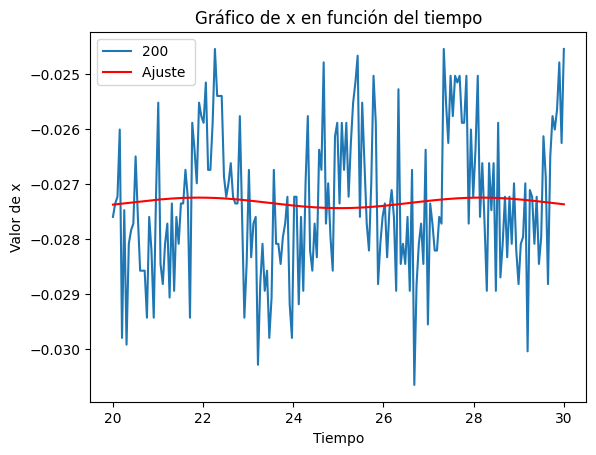

In [78]:
def fit(df, f, variable,xmin):
    x = np.linspace(xmin/20, (xmin+200)/20, 200)
    y = df[variable][xmin:xmin+200]

    popt, pcov = curve_fit(f, x, y)
    return x,y,popt,pcov



def f1(x, a, b, c,d,e):
    return a + b * np.cos(c * x) + d* np.sin(e*x)

def f2(x, a, b, c):
    return a + b * np.cos(c * x) 

def f3(x, a, b, c,d):
    return a + b * x**2 +c* x**4 -d*x**6
xmin = 400
f = f2

x,y,popt,pcov = fit(df, f, 'x',xmin)

plt.plot(x, y,label = f"{len(y)}")
plt.xlabel('Tiempo')
plt.ylabel(f'Valor de x')
plt.title(f'Gráfico de x en función del tiempo')
plt.plot(x, f(x, *popt), 'r-',label = f"Ajuste ")
plt.legend()

In [35]:
frecuencia = []


In [77]:
print("covariance\n",pcov)
print("**********")
print("desplazamiento = ",popt[0])
print("amplitud = ",popt[1])
print("frecuencia = ",popt[2])
frecuencia.append(popt[2])
frecuencia

covariance
 [[ 6.25382071e-09 -8.75482263e-11  1.68093235e-07]
 [-8.75482263e-11  1.21935816e-08  7.66628689e-08]
 [ 1.68093235e-07  7.66628689e-08  2.78895126e-04]]
**********
desplazamiento =  -0.027518978245751856
amplitud =  -0.0011766856578834563
frecuencia =  1.896412798269704


[1.896412798269704,
 1.0458699396837627,
 1.0039209794417867,
 1.0226195783774175,
 1.0239457395563178,
 1.896412798269704]

Text(0.5, 1.0, 'Gráfico de x en función del tiempo para 1S11.txt')

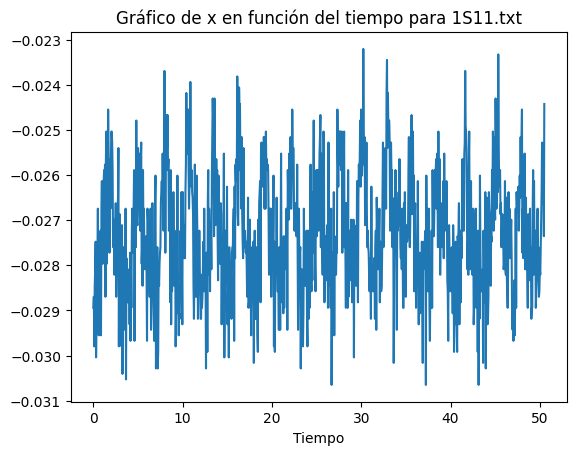

In [71]:
frec_media = np.mean(frecuencia)

y = df['x']
x = np.linspace(0, len(y)/20, len(y))
title = path[8:]
plt.plot(x, y,label = f"{len(y)}")
# plt.plot(x,f(x,popt[0],popt[1],frec_media),label = f"Ajuste {len(y)}")
plt.xlabel('Tiempo')
plt.title(f'x en función del tiempo para {title}')


Text(0.5, 1.0, 'y en función del tiempo para 1S11.txt')

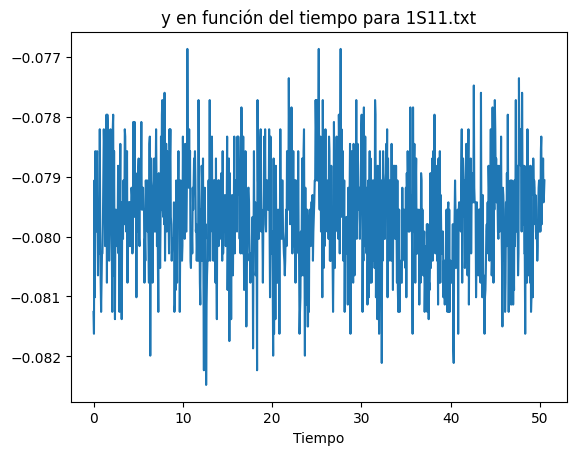

In [74]:

y = df['y']
x = np.linspace(0, len(y)/20, len(y))
title = path[8:]
plt.plot(x, y,label = f"{len(y)}")
# plt.plot(x,f(x,popt[0],popt[1],frec_media),label = f"Ajuste {len(y)}")
plt.xlabel('Tiempo')
plt.title(f'y en función del tiempo para {title}')